<a href="https://colab.research.google.com/github/Rishita32/Data_Science_Lab/blob/main/RishitaMote_Exp1_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Name: Rishita Mote
#### UID: 2018130029
#### Batch B

### **Experiment 1**
#### Objective: To carry out linear regression (including multiple regression) and build a regression model using Python Platform. 


#Part 2
#####Estimating horse fatalities from colic- use logistic regression to try to predict if a horse with colic will live or die

In [ ]:
#importing libraries 
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

###Load the dataset (Use pandas )

In [ ]:
# importing dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 
dataset=pd.read_csv('drive/MyDrive/Data Science/Lab/horse.csv')
df=pd.DataFrame(dataset)

Mounted at /content/drive


In [ ]:
df

surgery    age  hospital_number  ...  lesion_2  lesion_3  cp_data
0        no  adult           530101  ...         0         0       no
1       yes  adult           534817  ...         0         0       no
2        no  adult           530334  ...         0         0      yes
3       yes  young          5290409  ...         0         0      yes
4        no  adult           530255  ...         0         0       no
..      ...    ...              ...  ...       ...       ...      ...
294     yes  adult           533886  ...         0         0       no
295      no  adult           527702  ...         0         0      yes
296     yes  adult           529386  ...         0         0       no
297     yes  adult           530612  ...         0         0      yes
298     yes  adult           534618  ...         0         0       no

[299 rows x 28 columns]

In [ ]:
df.shape

(299, 28)

In [ ]:
df.info()

#The info given above gives the insights about horse data read using csv. It contains 299 samples and 28 features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

###Data Preprocessing (Handling NA values)

In [ ]:
#columns having more than 40% of the null values 
null_col=df.columns[df.isna().mean() > 0.40]
null_col
#drop columns with more than 40% null values
df=df.drop(columns= null_col)
df

surgery    age  hospital_number  ...  lesion_2  lesion_3  cp_data
0        no  adult           530101  ...         0         0       no
1       yes  adult           534817  ...         0         0       no
2        no  adult           530334  ...         0         0      yes
3       yes  young          5290409  ...         0         0      yes
4        no  adult           530255  ...         0         0       no
..      ...    ...              ...  ...       ...       ...      ...
294     yes  adult           533886  ...         0         0       no
295      no  adult           527702  ...         0         0      yes
296     yes  adult           529386  ...         0         0       no
297     yes  adult           530612  ...         0         0      yes
298     yes  adult           534618  ...         0         0       no

[299 rows x 25 columns]

In [ ]:
#Categorize the features into categorical and numerical
data_types=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_col=[]
categorical_col=[]
features=df.columns.values.tolist()
for i in features:
  if df[i].dtype in data_types:
    numerical_col.append(i)
  else: 
    categorical_col.append(i)

print("Numerical columns are: ", numerical_col)
print("Categorical columns are: " , categorical_col)


Numerical columns are:  ['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein', 'lesion_1', 'lesion_2', 'lesion_3']
Categorical columns are:  ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'outcome', 'surgical_lesion', 'cp_data']


In [ ]:
#filling NA values of numerical features with median value
for col in numerical_col:
    df.loc[(df["outcome"] == 'died') & (df[col].isnull()), col] = df[df["outcome"] == 'died'][col].median()
    df.loc[(df["outcome"] == 'euthanized') & (df[col].isnull()), col] = df[df["outcome"] == 'euthanized'][col].median()
    df.loc[(df["outcome"] == 'lived') & (df[col].isnull()), col] = df[df["outcome"] == 'lived'][col].median()


In [ ]:
#filling NA values of categorical features with mode value
for col in categorical_col:
    df.loc[(df["outcome"] == 'died') & (df[col].isnull()), col] = df[df["outcome"] == 'died'][col].mode()[0]
    df.loc[(df["outcome"] == 'euthanized') & (df[col].isnull()), col] = df[df["outcome"] == 'euthanized'][col].mode()[0]
    df.loc[(df["outcome"] == 'lived') & (df[col].isnull()), col] = df[df["outcome"] == 'lived'][col].mode()[0]

In [ ]:
#converting categorical to numerical using one hot encoding
for col in categorical_col:
    cat_data = df[col].astype('category')
    mapping = dict(enumerate(cat_data.cat.categories))

for col in categorical_col:
    df[col] = df[col].astype('category').cat.codes


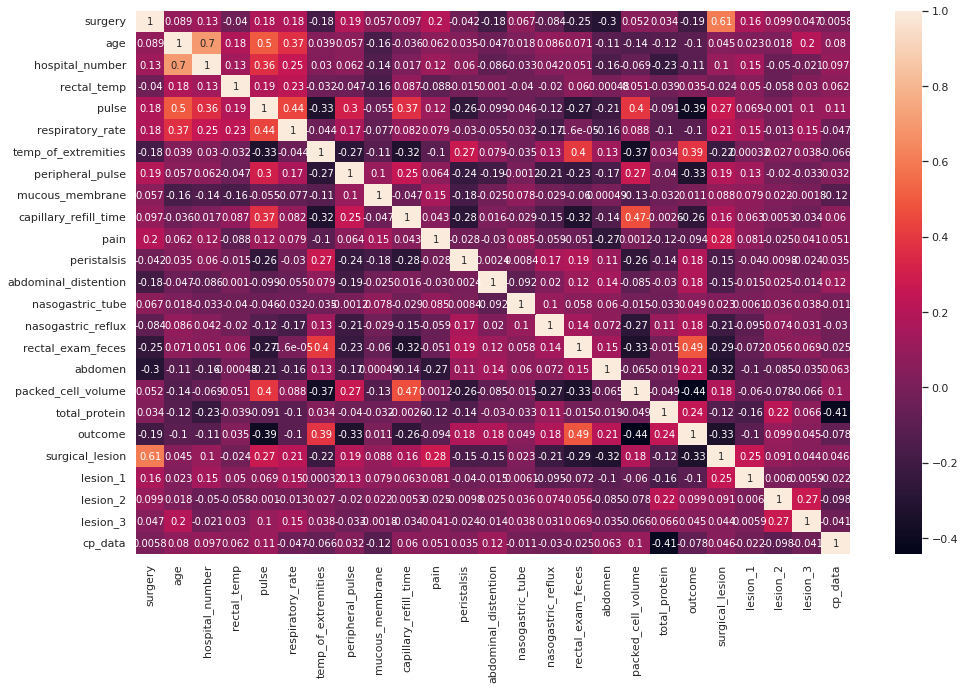

In [ ]:
#correlation graph
%matplotlib inline
plt.figure(figsize = (16,10))
sb.heatmap(df.corr(), annot=True)

We can see that rectal_exam_feces has the highest correlation of 0.487818 with the outcome variable

In [ ]:
# removing columns having less correlation with outcome feature
correlation_data = df.corr()
correlation_values = correlation_data['outcome'].sort_values(ascending=False)
correlation_values = abs(correlation_values).sort_values(ascending=False)
for col in range(len(correlation_values)):
    if abs(correlation_values[col]) < 0.24:
        df = df.drop([correlation_values.index[col]], axis=1)
df

pulse  temp_of_extremities  ...  outcome  surgical_lesion
0     66.0                    1  ...        0                0
1     88.0                    1  ...        1                0
2     40.0                    2  ...        2                0
3    164.0                    0  ...        0                1
4    104.0                    1  ...        0                0
..     ...                  ...  ...      ...              ...
294  120.0                    0  ...        1                0
295   72.0                    1  ...        1                1
296   72.0                    0  ...        0                1
297  100.0                    1  ...        2                1
298   40.0                    1  ...        1                0

[299 rows x 9 columns]

###Exploratory Data Analysis (understanding the relationships between the variables with help of plot, scatter-plot, enery-plot etc) Use matplotlib

In [ ]:
! pip uninstall pandas-profiling

Found existing installation: pandas-profiling 3.1.0
Uninstalling pandas-profiling-3.1.0:
  Would remove:
    /usr/local/bin/pandas_profiling
    /usr/local/lib/python3.7/dist-packages/pandas_profiling-3.1.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas_profiling/*
Proceed (y/n)? y
  Successfully uninstalled pandas-profiling-3.1.0


In [ ]:
!pip install pandas-profiling[notebook]

  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)


In [ ]:
!pip show pandas-profiling

Name: pandas-profiling
Version: 3.1.0
Summary: Generate profile report for pandas DataFrame
Home-page: https://github.com/pandas-profiling/pandas-profiling
Author: Simon Brugman
Author-email: pandasprofiling@gmail.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: PyYAML, joblib, tangled-up-in-unicode, missingno, numpy, seaborn, requests, scipy, pandas, phik, visions, markupsafe, htmlmin, tqdm, jinja2, pydantic, matplotlib, multimethod
Required-by: 


In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Impact of peripheral pulse on outcome ')

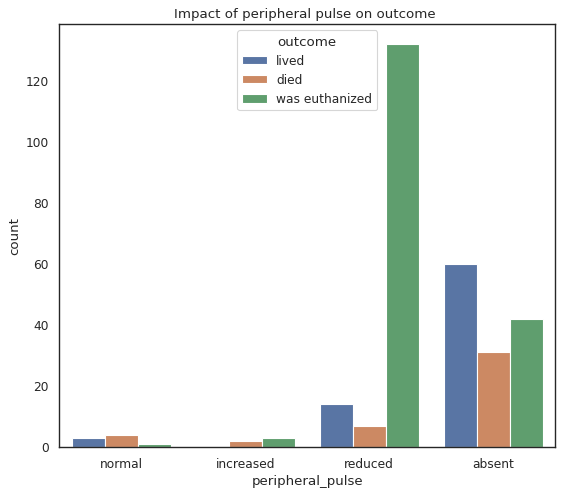

In [ ]:
fig = plt.subplots(figsize=(8,7), dpi=80, facecolor='w', edgecolor='k')
sb.set(style="white")
graph=sb.countplot(x='peripheral_pulse', hue = 'outcome',data = df)
graph.set_xticklabels(['normal','increased', 'reduced', 'absent']); 
plt.legend(title='outcome',  labels=['lived','died','was euthanized']); 
graph.set_title('Impact of peripheral pulse on outcome ')

#Observation: Horses with reduced peripheral pulse were euthanized

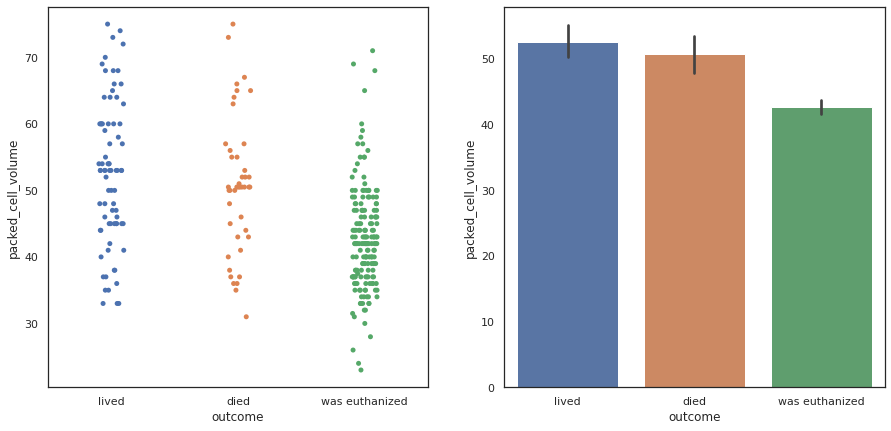

In [ ]:
#packed cell volumne and outcome
f, axes = plt.subplots(1, 2, figsize=(15,7))
g = sb.stripplot(data=df, y="packed_cell_volume", x = "outcome", ax=axes[0] );
g.set_xticklabels(['lived','died','was euthanized']); 
g = sb.barplot(data=df, x="outcome", y="packed_cell_volume", ax=axes[1]  );
g.set_xticklabels(['lived','died','was euthanized']);

#Observation: Most of the horses who lived had higher packed_cell_volume and those who died had little lower. The bar graph shows the mean value of packed_cell_volume for each class.

###Data Partition (80% for training and 20% for testing) (Use scikit-learn)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X = df.drop(columns='outcome')
Y = df[['outcome']]

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=58)



In [ ]:
# Normalization using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

### Build the model (use scikit learn)

In [ ]:
# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

### Summarise the model

In [ ]:
regressor.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Prediction

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)


In [ ]:
lr_score=regressor.score(X_test, y_test)
print("The accuracy  is: " ,lr_score)

The accuracy  is:  0.7333333333333333


### Evaluate the model

In [ ]:
#classification report 
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.74      0.67        19
           1       0.75      0.33      0.46         9
           2       0.82      0.84      0.83        32

    accuracy                           0.73        60
   macro avg       0.73      0.64      0.65        60
weighted avg       0.74      0.73      0.72        60

[[14  1  4]
 [ 4  3  2]
 [ 5  0 27]]


### Tuning

In [ ]:
grid = [
  {'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l1'], 'solver': ['liblinear', 'saga']},
  {'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'], 'solver': ['lbfgs','newton-cg', 'sag']}
 ]

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
grid_search = GridSearchCV(LogisticRegression(max_iter = 1000), param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
print(f"Best Params: {grid_result.best_params_}")

Best Params: {'C': 1.0, 'penalty': 'l2', 'solver': 'sag'}


In [ ]:
regressor = LogisticRegression(C= 1.0, penalty ='l2', solver = 'sag')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 46)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(solver='sag')

In [ ]:
print(f'Accuracy on Test data after tuning: {round(regressor.score(X_test, y_test), 4) *100} %')

Accuracy on Test data after tuning: 80.0 %
